<a href="https://colab.research.google.com/github/hilmialfar/Ruangguru-Project/blob/main/Group_Project_Time_series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align=center>Time-Series and Forecasting

# <h1 align=center>**Kelompok 7**

## **Business Understanding**

> **Business Problem:**

Sebuah perusahaan online retail yang berbasis di Inggris menjual produk berupa kado unik untuk segala acara ke berbagai negara. Agar dapat terus bersaing dengan kompetitor, mereka perlu membuat keputusan tentang strategi bisnis seperti apa yang tepat untuk digunakan pada waktu mendatang. Oleh karena itu, perlu untuk mengetahui bagaimana bisnis perusahaan tersebut kedepannya dari sisi revenue. 

> **Solution:**

Melakukan predictive analytics berupa time-series & forecasting untuk peramalan revenue perusahaan pada beberapa bulan kedepan.

> **Purpose:**

Memperoleh grafik time-series & forecasting revenue perusahaan.

> **Resources:**

- Dataset diperoleh dari Kaggle
- Tools yang digunakan adalah Jupyter Notebook dan Google Colab


## **Data Understanding**

In [ ]:
# IMPORT LIBRARY
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
#tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
# (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt as HWES  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
# Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# akses data ke jupyter/google colab
data = pd.read_csv("/content/drive/MyDrive/Portofolio/Online Retail.csv", encoding= 'unicode_escape')

### Exploratory Data Analysis

In [ ]:
#melihat smpel data
data.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,12/9/2011 12:49,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/9/2011 12:50,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,12/9/2011 12:50,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,12/9/2011 12:50,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:50,3.75,12680.0,France


> **Insights**

- Dataset mencakup data transaksi dari 01 Desember 2010 hingga 09 Desember 2011.
- Dataset ini memiliki jumlah baris sebanyak 541909 dan jumlah kolomnya sebanyak 8.
- Fitur dari dataset ini terdiri dari `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, `Country`.


> **Data Dictionary**:

| column | description |
| ------ | ----------- |
| `InvoiceNo` | Nomor invoice. Sebuah nomor integral 6 digit yang ditetapkan secara unik untuk setiap transaksi. |
| `StockCode` | Kode produk (barang). Sebuah bilangan integral 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda. |
| `Description` | Nama produk (barang). |
| `Quantity` | Jumlah setiap produk (item) per transaksi. |
| `InvoiceDate` | Tanggal dan waktu invoice. Hari dan waktu saat setiap transaksi dibuat. |
| `UnitPrice` | Harga produk per unit dalam poundsterling.|
| `CustomerID` | Nomor pelanggan. Sebuah nomor integral 5 digit yang ditetapkan secara unik untuk setiap pelanggan. |
| `Country` | Nama negara. Nama negara tempat tinggal setiap pelanggan. |

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


> **Insights**:

- Terdapat ***missing value*** pada fitur Description dan CustomerID. ***missing value*** tersebut tidak perlu ditangani karena fitur Description dan CustomerID tidak digunakan.
- Tipe data pada fitur InvoiceDate masih berupa `object`, sehingga perlu diubah menjadi tipe data `datetime` karena fitur InvoiceDate mengandung waktu. 

In [ ]:
#kondisi statistik 'Quantity' dan 'UnitPrice'
data[["Quantity", "UnitPrice"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.0


> **Insights**:
- Nilai minimum untuk fitur 'Quantity' adalah -80995 dan untuk fitur 'UnitPrice' adalah -11062.06. Kemungkinan nilai tersebut (< 0) merupakan piutang yang tidak tertagih atau pemesanan yang dibatalkan. Sehingga fitur 'Quantity' dan 'UnitPrice' perlu dilakukan filter untuk mendapatkan nilai lebih dari 0 yang berarti menghasilkan pendapatan.
- Nilai Median (50%) lebih kecil dari nilai rata-ratanya pada fitur 'Quantity' dan 'UnitPrice', sehingga mengindikasikan bahwa distribusi datanya *Right-Skewed*.



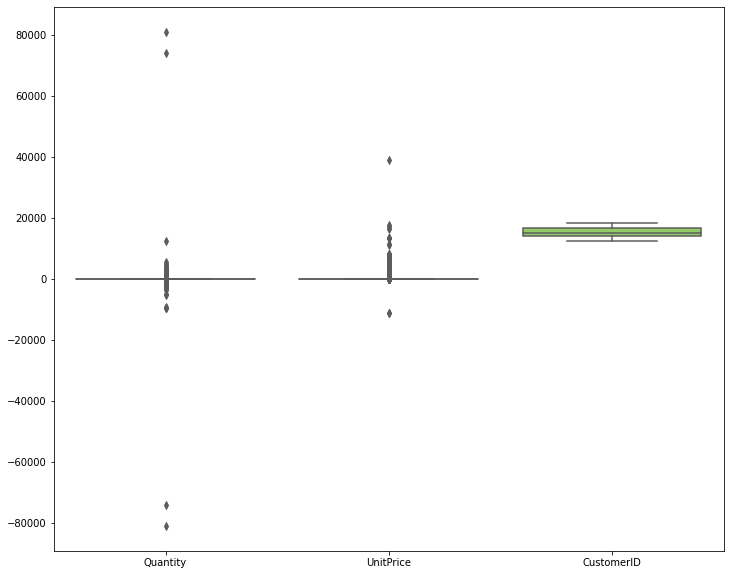

In [ ]:
#melihat kondisi data dengan boxplot
fig, ax = plt.subplots(figsize=(12,10)) #buat frame/figure
sns.boxplot(data= data, palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

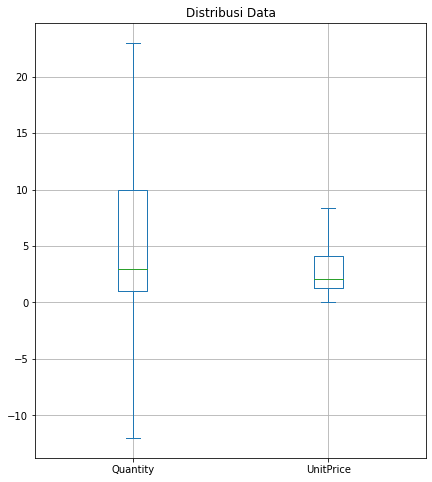

In [ ]:
#distribusi produk
dp = data[['Quantity','UnitPrice']].plot.box(showfliers= False, grid= True,figsize=(7,8))
plt.title('Distribusi Data')
plt.suptitle('')
plt.show()

> **Insights**:

- Pola distribusi fitur Quantity cenderung normal meski nilai mediannya lebih kecil dari rata-ratanya.
- Pola distribusi fitur UnitPrice adalah right-skewed.


> Pada fitur `Quantity` terdapat nilai < 0 sehingga perlu dilakukan filtering untuk mendapatkan data bernilai > 0. Hasil filtering tersebut akan digunakan untuk memperoleh data pendapatan (revenue).

> Selain itu, dilakukan penambahan kolom baru berupa fitur `Revenue` untuk melihat pendapatan yang dihasilkan perusahaan berdasarkan hasil perkalian fitur `Quantity` dengan `UnitPrice`.


In [ ]:
#filtering data Quantitiy >0 dan membuat kolom baru dari unit price*quantity
data_filter = data.loc[data['Quantity']>0 ]
data_filter1 = pd.DataFrame(data_filter)
data_filter1['Revenue'] = data_filter1['Quantity']*data_filter1['UnitPrice']
data_filter1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


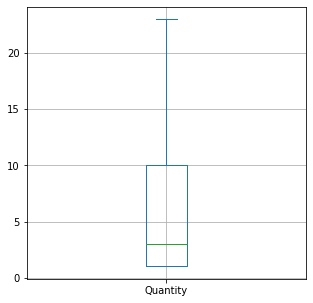

In [ ]:
#cek hasil filter 
dp = data_filter1['Quantity'].plot.box(showfliers= False,grid= True,figsize=(5,5))
plt.suptitle('')
plt.show()

In [ ]:
#cek kondisi statistik kolom Quantity
data_filter1['Quantity'].describe()

count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
#cek kondisi statistik kolom revenue
data_filter1['Revenue'].describe()

count    531285.00000
mean         20.03550
std         270.91237
min      -11062.06000
25%           3.75000
50%           9.90000
75%          17.70000
max      168469.60000
Name: Revenue, dtype: float64

> Karena terdapat data yang dibawah nol maka dilakukan filtering lagi

In [ ]:
#cek jumlah dat dibawah 0
data_filter1.loc[data_filter1['Revenue']<0].shape

(2, 9)

In [ ]:
data_filter1.loc[data_filter1['Revenue']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,-11062.06


> Terdapat 2 data pada fitur `Revenue` dengan nilai di bawah 0.


In [ ]:
#filtering data revenue
df = data_filter1.loc[data_filter1['Revenue']>0]

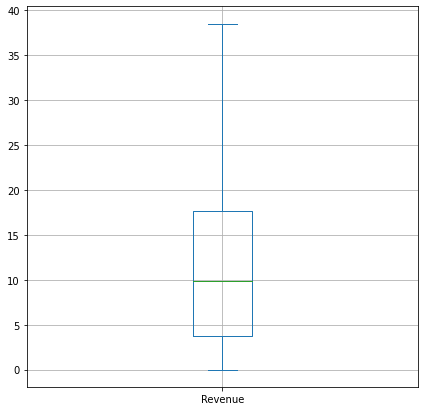

In [ ]:
#cek kondisi data revenue
rev = df['Revenue'].plot.box(showfliers= False ,grid= True,figsize=(7,7))
plt.suptitle('')
plt.show()

In [ ]:
#cek kondisi statistik kolom quantity, unitprice, dan revenue
df[['Quantity','UnitPrice','Revenue']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Quantity,530104.0,10.54,155.52,1.0,1.00,3.00,10.00,80995.00
UnitPrice,530104.0,3.91,35.92,0.0,1.25,2.08,4.13,13541.33
Revenue,530104.0,20.12,270.36,0.0,3.75,9.90,17.70,168469.60


> Sudah tidak ada data dengan nilai di bawah 0 untuk fitur `Quantity`, `UnitPrice`, dan `Revenue`.



> Kemudian dilakukan pengubahan tipe data fitur `InvoiceDate` dari `object` menjadi tipe data `datetime`.

In [ ]:
#konversi tipe data dari objek ke datetime pada kolom InvoiceNo
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate)
df[['InvoiceDate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  530104 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.1 MB


> Pada studi kasus ini hanya digunakan fitur `InvoiceDate` dan `Revenue` untuk dilakukan analisis Time-Series & Forecasting.

> Fitur `InvoiceDate` yang mengandung 'date' dijadikan sebagai index dari dataframe.

In [ ]:
#pengambilan tim series pendapatan
pendapatan_df = pd.DataFrame(df.groupby("InvoiceDate").Revenue.sum())
pendapatan_df = pendapatan_df.iloc[:-1]
pendapatan_df

,Revenue
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 08:45:00,855.86
...,...
2011-12-09 12:21:00,29.88
2011-12-09 12:23:00,124.60
2011-12-09 12:25:00,140.64


### Monthly Revenue

In [ ]:
#Pendapatan Bulanan
pendapatan_bulanan = df.set_index('InvoiceDate')['Revenue'].resample('M').nunique()

In [ ]:
pendapatan_bulanan

InvoiceDate
2010-12-31    1448
2011-01-31    1404
2011-02-28    1100
2011-03-31    1339
2011-04-30    1158
2011-05-31    1295
2011-06-30    1434
2011-07-31    1371
2011-08-31    1374
2011-09-30    1496
2011-10-31    1692
2011-11-30    2026
2011-12-31    1296
Freq: M, Name: Revenue, dtype: int64

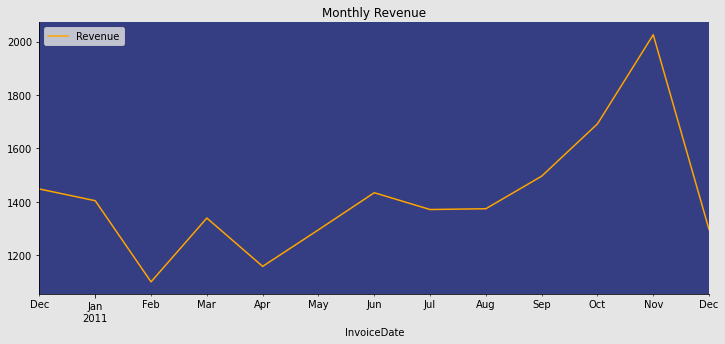

In [ ]:
# Visualisasi pendapatan bulanan
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#353E82")

pendapatan_bulanan.plot(ax = ax, color="orange").set_title("Monthly Revenue")
ax.legend(facecolor = "#e5e5e5")

sns.despine()
plt.show()

> **Insights**:

- Terlihat pola tren meningkat dimulai dari bulan Februari dan puncaknya di bulan November. 
- Pendapatan terendah diperoleh pada bulan Februari.


### Weekly Revenue

In [ ]:
# pendapatan mingguan
pendapatan_mingguan = pendapatan_df.resample("W").sum()
pendapatan_mingguan.tail(54)

,Revenue
InvoiceDate,
2010-12-05,185427.830
2010-12-12,329936.810
2010-12-19,216012.200
2010-12-26,92369.300
2011-01-02,0.000
2011-01-09,133658.190
2011-01-16,193362.040
2011-01-23,215533.180
2011-01-30,125170.790


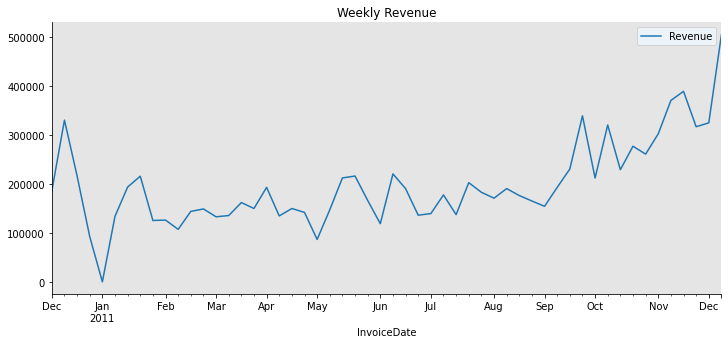

In [ ]:
# visualisasi pendapatan mingguan
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#ffffff")
ax.set_facecolor("#e5e5e5")

pendapatan_mingguan.plot(ax = ax).set_title("Weekly Revenue")
ax.legend(facecolor = "#F0F8FF")

sns.despine()
plt.show()

> **Insights**:

- Terlihat pola horizontal (2011-01-23 hingga 2011-05-22) dan tren meningkat (2011-06-05 hingga 2011-12-11). 
- Pada minggu ke-1 bulan Januari 2011 (02-01-2011), pendapatan menyentuh angka 0 yang artinya tidak ada sama sekali pendapatan yang dihasilkan oleh perusahaan.


### Daily Revenue

In [ ]:
#pendapatan harian 
pendapatan_harian = pd.DataFrame(df.groupby("InvoiceDate").sum().resample("D").sum()["Revenue"])
pendapatan_harian

,Revenue
InvoiceDate,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-04,0.00
2010-12-05,31774.95
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


> **Insights:**

Untuk pendapatan harian ditemukan data dengan nilai 0 yang kemungkinan perusahaan sedang tidak melakukan transaksi atau tutup.

In [ ]:
#filter pendapatan = 0
pendapatan_harian.loc["2010-12-23" : "2011-1-4"]

,Revenue
InvoiceDate,
2010-12-23,12076.11
2010-12-24,0.00
2010-12-25,0.00
2010-12-26,0.00
2010-12-27,0.00
2010-12-28,0.00
2010-12-29,0.00
2010-12-30,0.00
2010-12-31,0.00


> Untuk nilai pendapatan harian = 0 diberikan label status tutup sedangkan untuk nilai > 0 diberikan label status buka. Maka ditambahkan kolom Status.


In [ ]:
#Memberikan label status tutup untuk pendapatan 0
pendapatan_harian.reset_index(inplace = True)
pendapatan_harian["Status"] = np.where((pendapatan_harian.Revenue == 0), "Tutup", "Buka")
pendapatan_harian.set_index("InvoiceDate", inplace = True)

> Ditambahkan juga kolom hari untuk dilakukan analisis pada hari apa saja ditemukan nilai pendapatan harian = 0.

In [ ]:
# penambahan_kolom hari
pendapatan_harian["hari"] = pendapatan_harian.index.day_name()
pendapatan_harian.tail(50)

,Revenue,Status,hari
InvoiceDate,,,
2011-10-21,63226.64,Buka,Friday
2011-10-22,0.00,Tutup,Saturday
2011-10-23,12339.16,Buka,Sunday
2011-10-24,48752.91,Buka,Monday
2011-10-25,41314.64,Buka,Tuesday
2011-10-26,38059.43,Buka,Wednesday
2011-10-27,57291.72,Buka,Thursday
2011-10-28,40565.70,Buka,Friday
2011-10-29,0.00,Tutup,Saturday


In [ ]:
pendapatan_harian

,Revenue,Status,hari
InvoiceDate,,,
2010-12-01,58960.79,Buka,Wednesday
2010-12-02,47748.38,Buka,Thursday
2010-12-03,46943.71,Buka,Friday
2010-12-04,0.00,Tutup,Saturday
2010-12-05,31774.95,Buka,Sunday
...,...,...,...
2011-12-05,88741.96,Buka,Monday
2011-12-06,56713.21,Buka,Tuesday
2011-12-07,75439.16,Buka,Wednesday


In [ ]:
# cek hari tutup
pendapatan_harian.groupby("hari").Revenue.sum()

hari
Friday       1840340.231
Monday       1779575.041
Saturday           0.000
Sunday        813827.611
Thursday     2203161.240
Tuesday      2178632.611
Wednesday    1851147.810
Name: Revenue, dtype: float64

> **Insights**

Pendapatan = 0 terjadi di hari Sabtu maka dapat diketahui bahwa hari Sabtu adalah hari libur perusahaan bertransaksi


In [ ]:
# analsis pendapatan hari kerja filter selain hari tutup
pendapatan_harikerja= pendapatan_harian[pendapatan_harian.Revenue > 0].copy()
pendapatan_harian.drop("hari", axis = 1, inplace = True)
pendapatan_harikerja.drop("hari", axis = 1, inplace = True)

In [ ]:
pendapatan_harikerja

,Revenue,Status
InvoiceDate,,
2010-12-01,58960.79,Buka
2010-12-02,47748.38,Buka
2010-12-03,46943.71,Buka
2010-12-05,31774.95,Buka
2010-12-06,54830.46,Buka
...,...,...
2011-12-05,88741.96,Buka
2011-12-06,56713.21,Buka
2011-12-07,75439.16,Buka


In [ ]:
pendapatan_harikerja.isnull().T.any().T.sum()

0

> Pendapatan = 0 sudah berhasil dihilangkan atau difilter.

## **Data Preparation**

### Stationarity Check - Rolling Statistic test

In [ ]:
#mengahupus kolom status menyisakan revenue pada pendapatan harian
revenue_day = pendapatan_harikerja.drop('Status', axis= 1)

In [ ]:
revenue_day

,Revenue
InvoiceDate,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-05,31774.95
2010-12-06,54830.46
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


In [ ]:
revenue_day.isnull().T.any().T.sum()

0

In [ ]:
#rolling dengan interval sebesar 30 hari dan hitung rata-rata
rolmean= revenue_day.rolling(30).mean()  

# rolling dengan interval window sebesar 30 hari dan hitung st. deviasi
rolstd= revenue_day.rolling(30).std() 

# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')

# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))            

15 baris pertama rolling mean: 
             Revenue
InvoiceDate         
2010-12-01       NaN
2010-12-02       NaN
2010-12-03       NaN
2010-12-05       NaN
2010-12-06       NaN
2010-12-07       NaN
2010-12-08       NaN
2010-12-09       NaN
2010-12-10       NaN
2010-12-12       NaN
2010-12-13       NaN
2010-12-14       NaN
2010-12-15       NaN
2010-12-16       NaN
2010-12-17       NaN

15 baris pertama std. deviasi: 
             Revenue
InvoiceDate         
2010-12-01       NaN
2010-12-02       NaN
2010-12-03       NaN
2010-12-05       NaN
2010-12-06       NaN
2010-12-07       NaN
2010-12-08       NaN
2010-12-09       NaN
2010-12-10       NaN
2010-12-12       NaN
2010-12-13       NaN
2010-12-14       NaN
2010-12-15       NaN
2010-12-16       NaN
2010-12-17       NaN


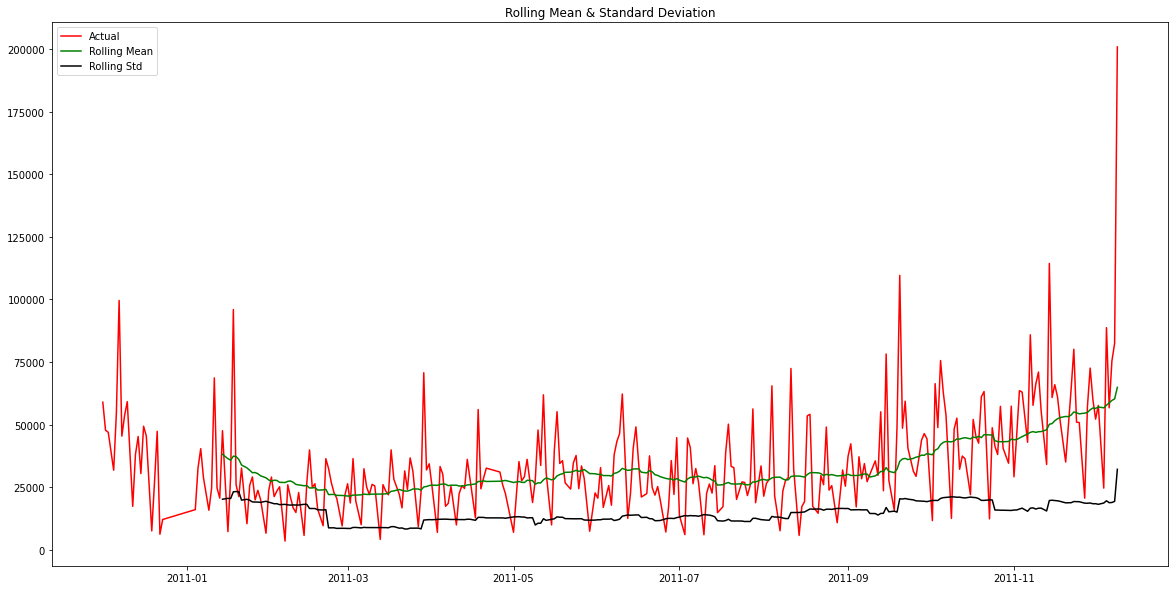

In [ ]:
# atur ukuran chart
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(revenue_day, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False) 

### Stationarity Check - Augmented Dickey-Fuller (ADF) test


H0: Revenue is non-stationary.
H1: Revenue is stationary.


In [ ]:
# menggunakan function adfuller() yang diterapkan pada variable #Passengers
print('Dickey-Fuller Test: ')
dftest=adfuller(revenue_day['Revenue'], autolag='AIC')
dftest

Dickey-Fuller Test: 


(0.03197876291547659,
 0.9610981503217911,
 11,
 293,
 {'1%': -3.452867117291862,
  '10%': -2.5720532321867466,
  '5%': -2.8714554160827745},
 6424.320147327064)

In [ ]:
#Fungsi kedua untuk cek dilengkapi dengan kesimpulan hipotesis
def check_adf(series, check = 0.05):
    
    adf = adfuller(series, autolag = "AIC")
    
    print(f"H0: {series.name} is non-stationary.")
    print(f"H1: {series.name} is stationary.\n")
    
    test_stat = adf[0]; print(f"ADF test statistic: {adf[0]}")
    pvalue = adf[1]; print(f"p-value: {adf[1]}")
    print(f"Number of lags: {adf[2]}")    
    print("\nCritical Values : \n")
    for key, item in adf[4].items(): print("\t", key, "\t", item)
    
    print(f"\nFor {check} significance level: \n")
    if pvalue < check:
        print("We can reject null hypothesis. This series is stationary.")
    else:
        print("We can not reject null hypothesis. This series is non-stationary.")

In [ ]:
print("Performing Augmented Dickey-Fuller test for Revenue \n")

check_adf(revenue_day.Revenue)

Performing Augmented Dickey-Fuller test for Revenue 

H0: Revenue is non-stationary.
H1: Revenue is stationary.

ADF test statistic: 0.03197876291547659
p-value: 0.9610981503217911
Number of lags: 11

Critical Values : 

	 1% 	 -3.452867117291862
	 5% 	 -2.8714554160827745
	 10% 	 -2.5720532321867466

For 0.05 significance level: 

We can not reject null hypothesis. This series is non-stationary.


Untuk uji ADF, H0 gagal ditolak dan seri ini tidak stasioner.

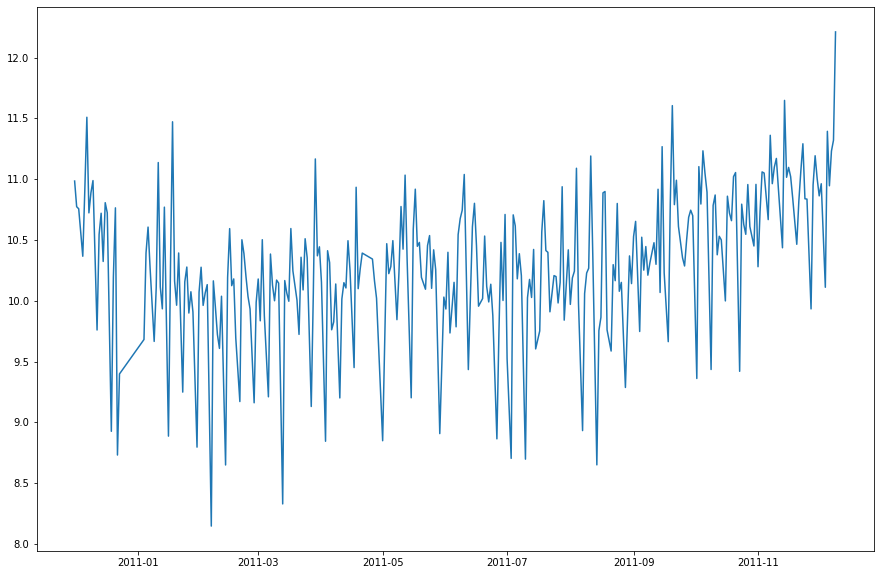

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(15,10))
data_log=np.log(revenue_day['Revenue']) 
plt.plot(data_log)

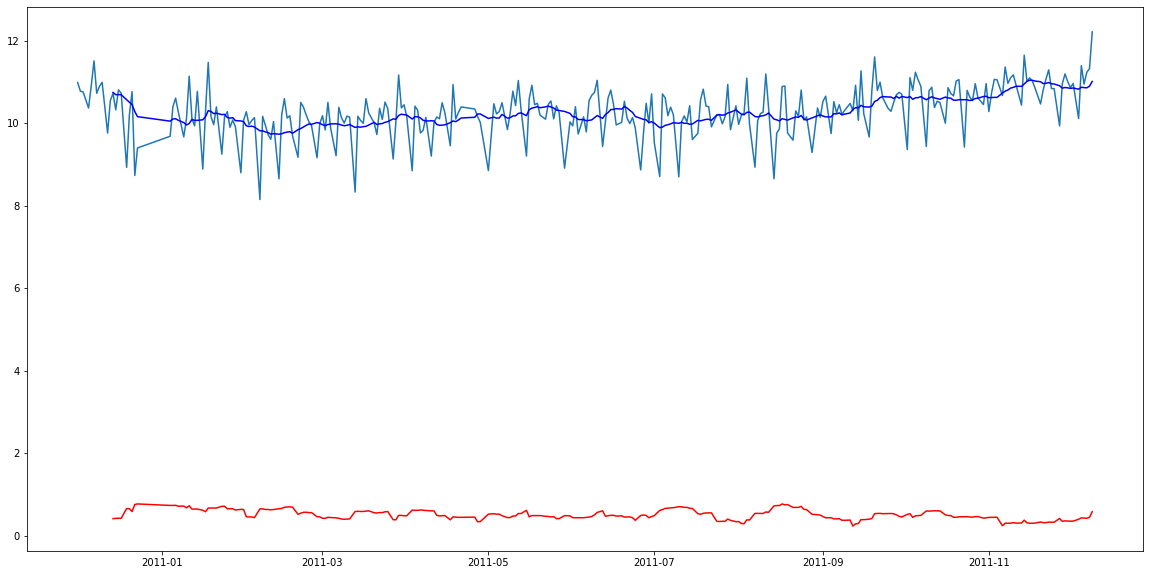

In [ ]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg

# Tampilkan 12 baris teratas dari data_log_diff
data_log_diff.head(12)

InvoiceDate
2010-12-01         NaN
2010-12-02         NaN
2010-12-03         NaN
2010-12-05         NaN
2010-12-06         NaN
2010-12-07         NaN
2010-12-08         NaN
2010-12-09         NaN
2010-12-10         NaN
2010-12-12         NaN
2010-12-13         NaN
2010-12-14   -0.024002
Name: Revenue, dtype: float64

In [ ]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
data_log_diff=data_log_diff.dropna() 
data_log_diff

InvoiceDate
2010-12-14   -0.024002
2010-12-15   -0.365319
2010-12-16    0.115014
2010-12-17    0.034686
2010-12-19   -1.641756
                ...   
2011-12-05    0.522773
2011-12-06    0.085237
2011-12-07    0.375557
2011-12-08    0.424857
2011-12-09    1.200482
Name: Revenue, Length: 294, dtype: float64

In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

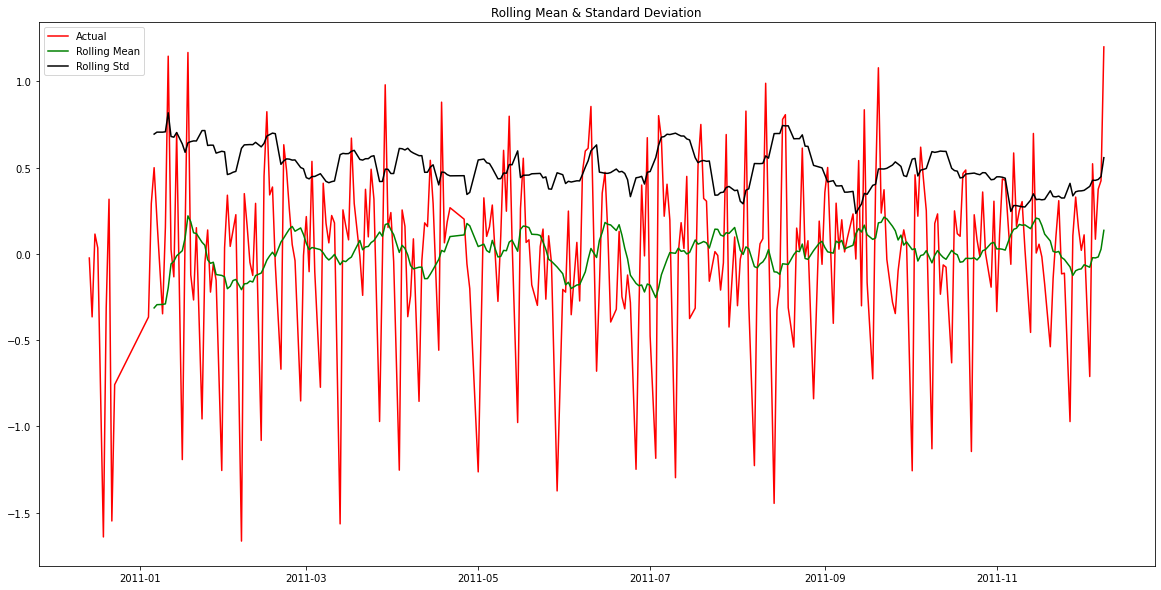

In [ ]:
# panggil function dan terapkan pada data_log_diff
stationarity(data_log_diff)

In [ ]:
# cek hasil tes dari Dickey-Fuller
print("Performing Augmented Dickey-Fuller test for 1st Difference Revenue (All Days)")
check_adf(data_log_diff.diff().dropna())


Performing Augmented Dickey-Fuller test for 1st Difference Revenue (All Days)
H0: Revenue is non-stationary.
H1: Revenue is stationary.

ADF test statistic: -9.35100647649219
p-value: 8.296096074104827e-16
Number of lags: 10

Critical Values : 

	 1% 	 -3.4537536300652
	 5% 	 -2.8718443180148836
	 10% 	 -2.572260641818822

For 0.05 significance level: 

We can reject null hypothesis. This series is stationary.


> Insights:

- Hasil ADF test menunjukkan p-value < 0.05 maka H0 dapat ditolak dan menerima H1, yaitu sudah stationer

### Stationarity Check - Shift test

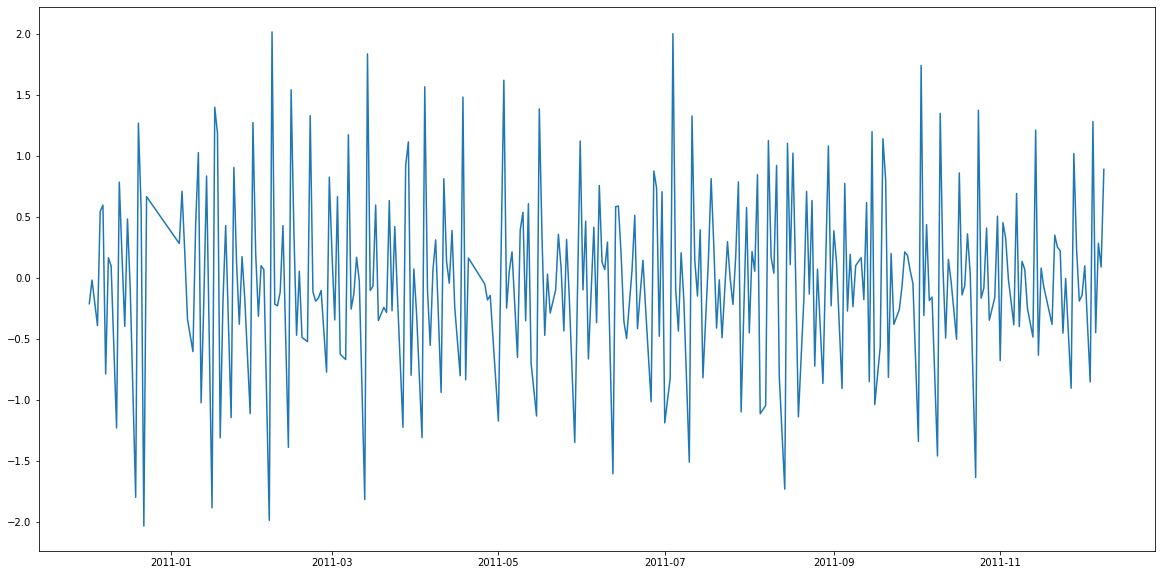

In [ ]:
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=data_log-data_log.shift() 

# Tampilkan chart
plt.plot(data_shift)

In [ ]:
# Check missing value
data_shift.isna().sum()

1

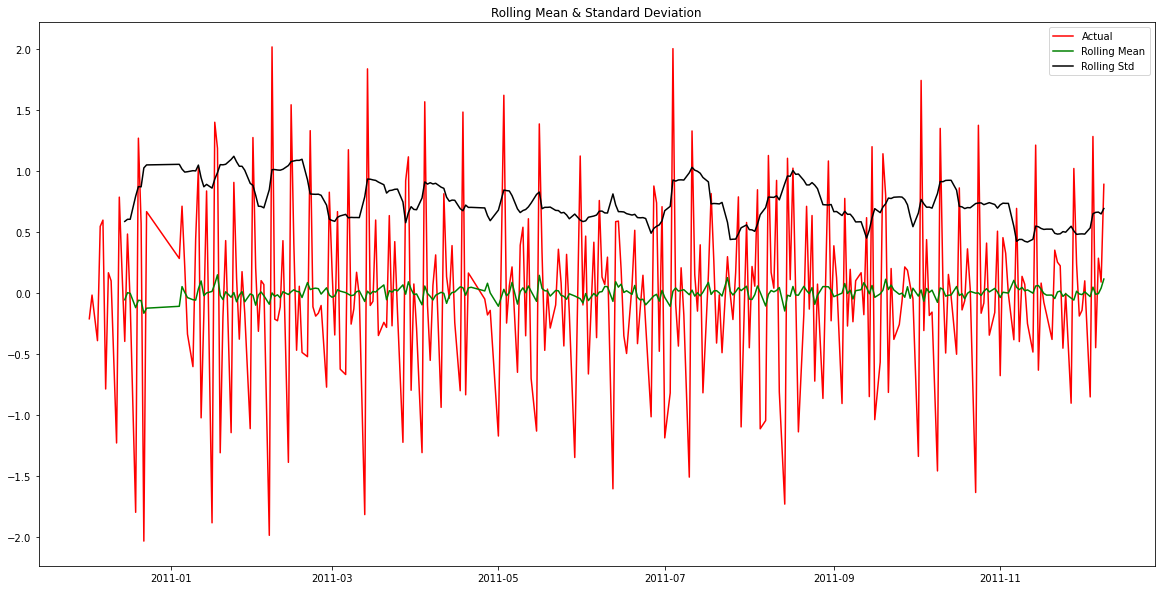

In [ ]:
# Lakukan dropna 
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

In [ ]:
print("Performing Augmented Dickey-Fuller test for 1st Difference Revenue (All Days)")
check_adf(data_shift.diff().dropna())


Performing Augmented Dickey-Fuller test for 1st Difference Revenue (All Days)
H0: Revenue is non-stationary.
H1: Revenue is stationary.

ADF test statistic: -9.575491550666815
p-value: 2.229220533425233e-16
Number of lags: 14

Critical Values : 

	 1% 	 -3.453261605529366
	 5% 	 -2.87162848654246
	 10% 	 -2.5721455328896603

For 0.05 significance level: 

We can reject null hypothesis. This series is stationary.


> Insights:

Dari `data_shift` di atas, hasil ADF test menunjukkan bahwa nilai Test statistic yg jauh lebih kecil daripada Critical Value pada berbagai tingkat keyakinan dan p-value < 0.05 mengindikasikan bahwa kita dapat menolak H0 dan menerima H1, yaitu series ini stationer. 


### Decomposition and Autocorrelation Function

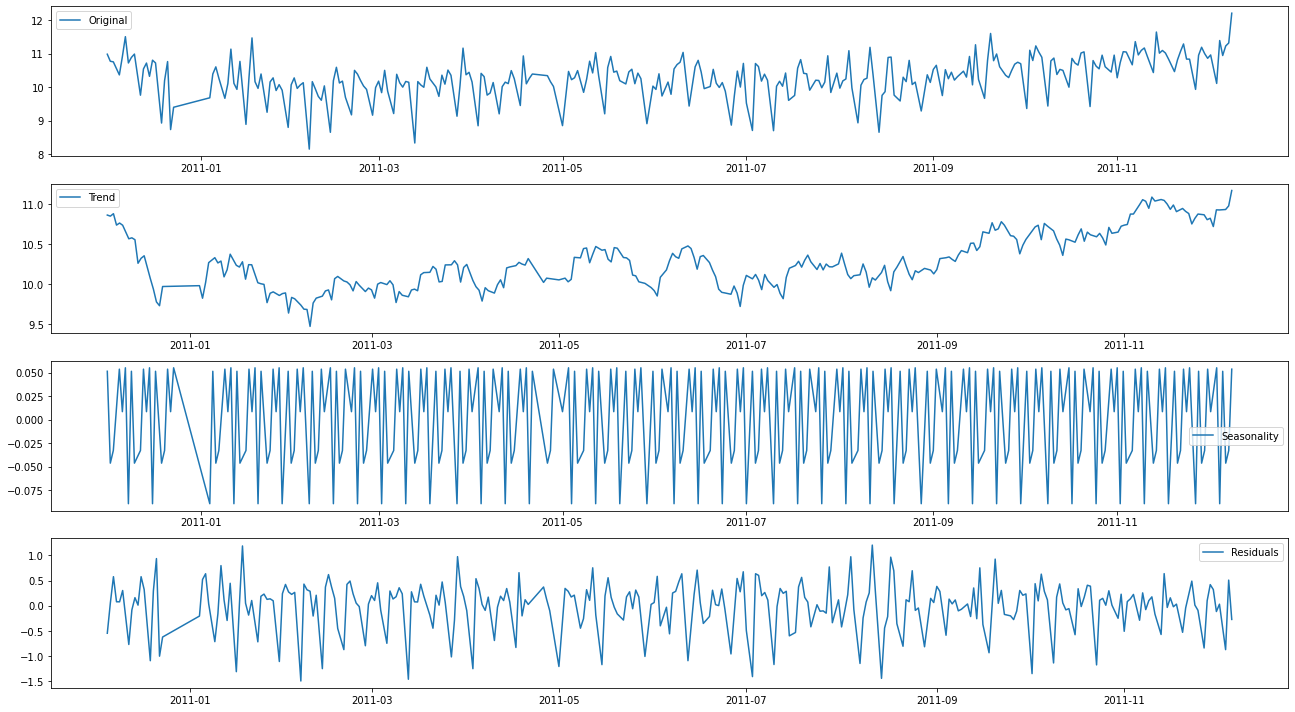

In [ ]:
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(data_log, freq=7)

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar 
plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

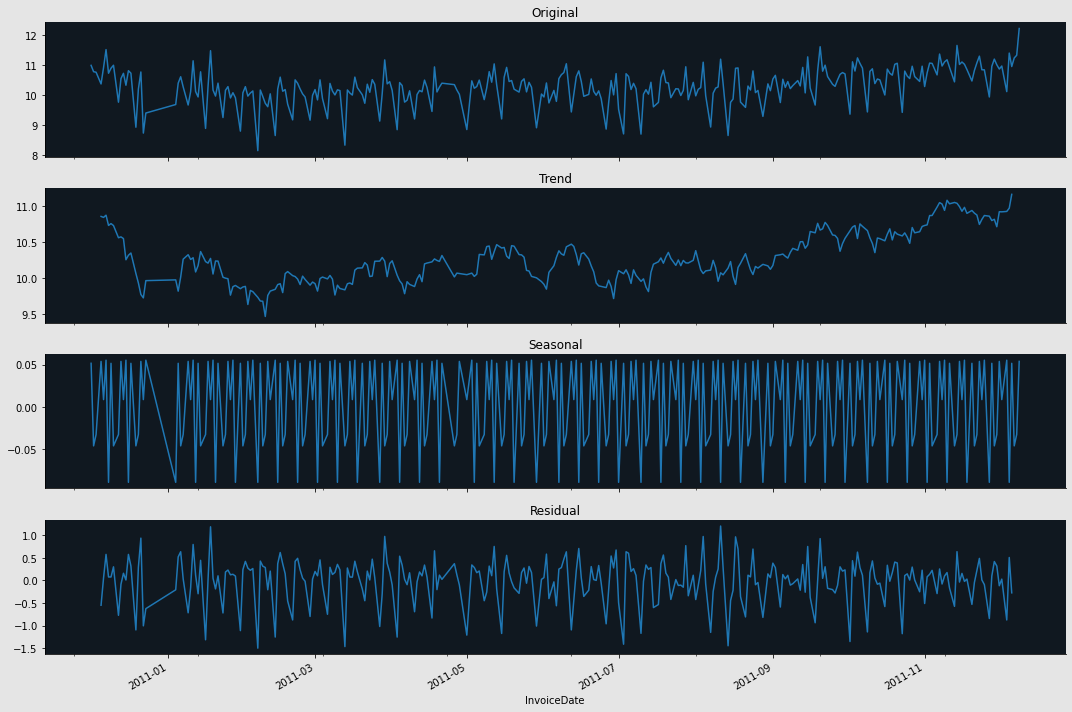

In [ ]:
#visualisasi mode gelap
fig, axes = plt.subplots(4, 1, sharex = True, figsize = (15, 10), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#101820")

decomp.observed.plot(ax = axes[0]).set_title("Original")
decomp.trend.plot(ax = axes[1]).set_title("Trend")
decomp.seasonal.plot(ax = axes[2]).set_title("Seasonal")
decomp.resid.plot(ax = axes[3]).set_title("Residual")

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

Trend 
 InvoiceDate
2010-12-01          NaN
2010-12-02          NaN
2010-12-03          NaN
2010-12-05    10.860802
2010-12-06    10.847148
2010-12-07    10.877817
2010-12-08    10.735451
2010-12-09    10.761034
2010-12-10    10.733615
2010-12-12    10.564267
2010-12-13    10.576225
2010-12-14    10.552600
2010-12-15    10.258159
2010-12-16    10.320389
2010-12-17    10.351651
2010-12-19    10.067685
2010-12-20     9.935588
2010-12-21     9.774905
2010-12-22     9.727684
2010-12-23     9.967521
2011-01-04     9.978042
2011-01-05     9.821190
2011-01-06    10.017896
2011-01-07    10.266163
Name: Revenue, dtype: float64 

Seasonal 
 InvoiceDate
2010-12-01    0.051410
2010-12-02   -0.046314
2010-12-03   -0.032864
2010-12-05    0.053665
2010-12-06    0.008445
2010-12-07    0.055111
2010-12-08   -0.089452
2010-12-09    0.051410
2010-12-10   -0.046314
2010-12-12   -0.032864
2010-12-13    0.053665
2010-12-14    0.008445
2010-12-15    0.055111
2010-12-16   -0.089452
2010-12-17    0.051410
2010

> **Insights:**

Dari data residual, kita dapat melihat banyak NA value, maka kita lakukan dropna

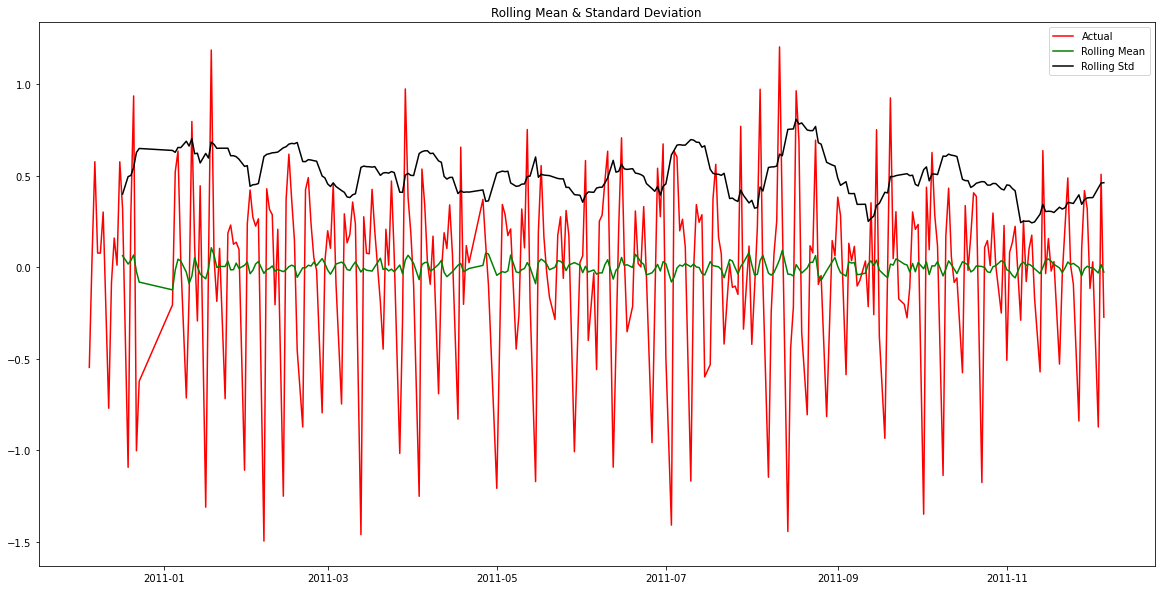

In [ ]:
# assign variable baru decomp_data dengan variabel residual di atas
decomp_data=residual

# terapkan function dropna
decomp_data=decomp_data.dropna()

# Panggil function stationarity dan terapkan pada decomp data yang tanpa NA value
stationarity(decomp_data)

> **Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

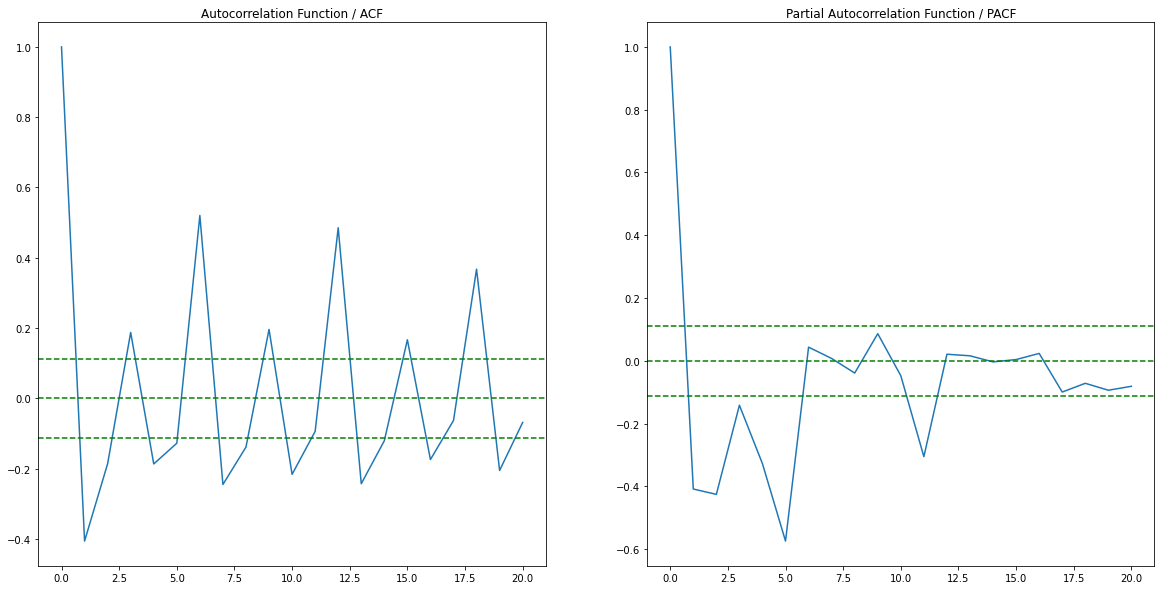

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

## **Model Development**

In [ ]:
# Split the data
train = revenue_day[0:int(len(revenue_day)*0.80)]   #train data sebesar 80%
test = revenue_day[int(len(revenue_day)*0.80):]     #test data sebesar 20%

In [ ]:
test

,Revenue
InvoiceDate,
2011-09-30,44357.06
2011-10-02,11634.53
2011-10-03,66376.82
2011-10-04,48810.65
2011-10-05,75593.63
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


Model Holt Winter Exponential Smoothing

In [ ]:
# pemodelan
model_data = ExponentialSmoothing(np.asarray(train['Revenue']),seasonal_periods= 7, trend='add',seasonal='mul').fit(optimized=True)

In [ ]:
#copy test
data_Holt = test.copy() 

In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['Revenue']))

In [ ]:
data_Holt.head()

,Revenue,Holt
InvoiceDate,,
2011-09-30,44357.06,40033.044889
2011-10-02,11634.53,44573.767204
2011-10-03,66376.82,38734.035943
2011-10-04,48810.65,35718.586150
2011-10-05,75593.63,39407.537756


In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params 

{'damping_slope': nan,
 'initial_level': 32678.042984624542,
 'initial_seasons': array([1.54656358, 1.34394405, 1.23931783, 1.36731235, 1.54662591,
        1.59336513, 1.3890154 ]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.10319801410188233,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 1.1457033185262655e-13,
 'use_boxcox': False}

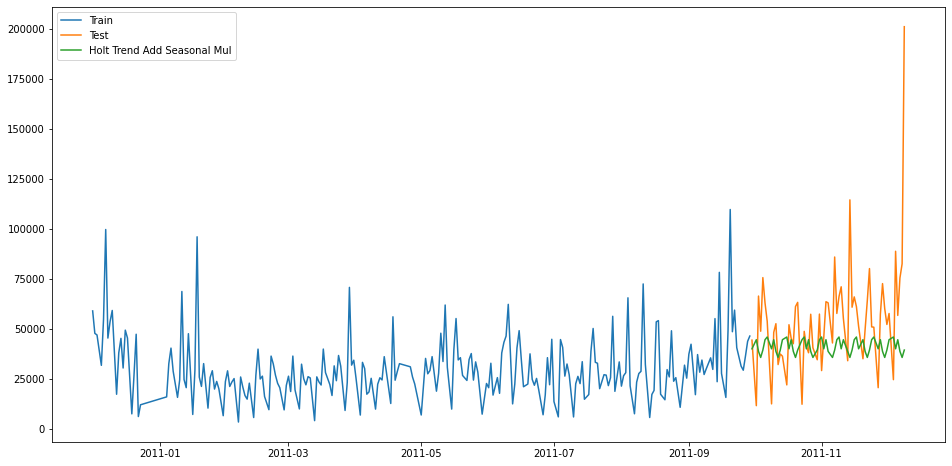

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['Revenue'], label='Train')
plt.plot(test['Revenue'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

### ARIMA

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 33.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm

In [ ]:
from pmdarima import auto_arima

In [ ]:
#pemodelan
arima = auto_arima(train, seasonal= True, m=12, information_criterion="aic", trace=True, random_state= 42)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=5385.594, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5416.482, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5400.845, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5398.523, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5785.368, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=5399.443, Time=1.35 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=5391.565, Time=4.37 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=5387.529, Time=9.64 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=5384.714, Time=12.44 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=5383.967, Time=4.88 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=5385.782, Time=2.72 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=5387.530, Time=2.72 sec
 ARIMA(3,0,2)(0,0,2)[12] intercept   : AIC=5383.745, Time=6.01 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=5397.340, Time=2.55 sec
 ARIMA(3,0,2)(1,0,

In [ ]:
#cek arima yang cocok
#sebenarnya model ini sudah masuk sarimax
arima

ARIMA(order=(5, 0, 5), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [ ]:
#untuk membantu visualisasi bagi saya
b=train

In [ ]:
#untuk membantu visualisasi bagi saya
b.reset_index()

,InvoiceDate,Revenue
0,2010-12-01,58960.790
1,2010-12-02,47748.380
2,2010-12-03,46943.710
3,2010-12-05,31774.950
4,2010-12-06,54830.460
...,...,...
239,2011-09-25,31372.661
240,2011-09-26,29335.171
241,2011-09-27,36322.950
242,2011-09-28,43749.060


In [ ]:
n_forecast = len(test)+30 #batas forcast
pred= arima.predict(n_forecast) #pemanggilan fungsi model dengan parameter n_forecast
#mempermudah visualisasi
dates= pd.date_range(b.index[-1], periods= n_forecast , freq="d")
pred = pd.Series(pred, index=dates)


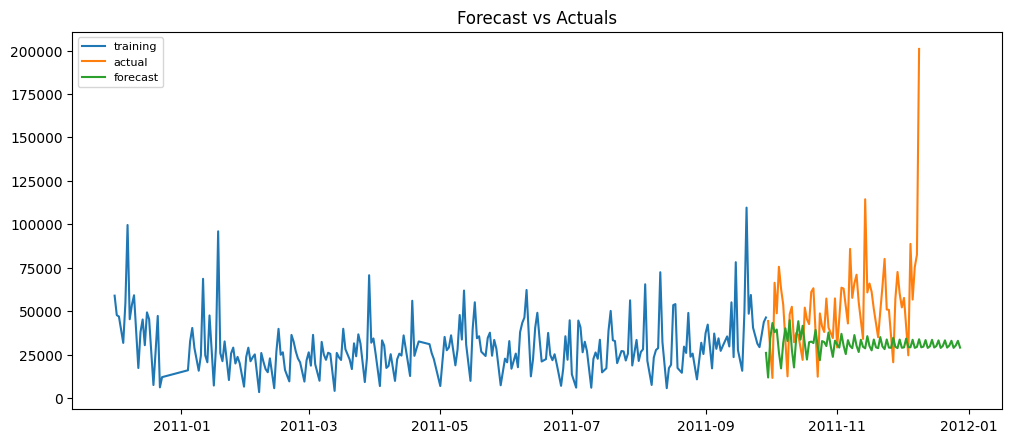

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Plot ACF and PACF for residuals of ARIMAX model**

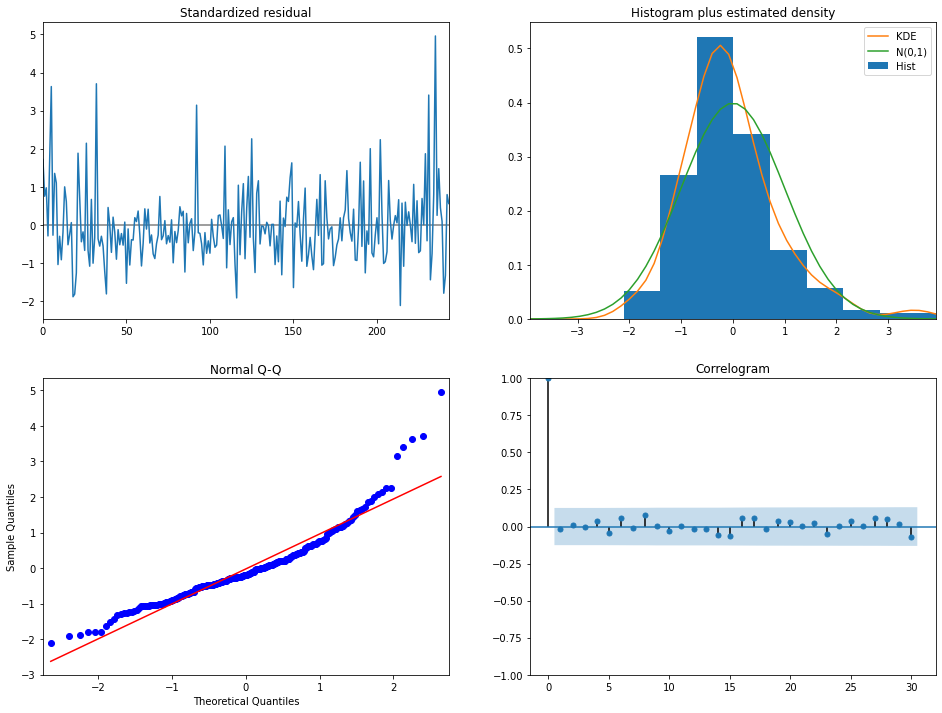

In [ ]:
arima.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [ ]:
#manipulasi untuk membantu pengujian
prediksi= pd.DataFrame(pred)


In [ ]:
#manipulasi untuk membantu pengujian
testcop = test.copy()
testcop['forecast']= prediksi.copy()

**Model Prophet**

In [ ]:
from fbprophet import Prophet

In [ ]:
split_prophet = revenue_day[["Revenue"]].dropna().reset_index()

split_prophet.columns = ["ds", "y"]

train_size = int(0.85 * len(split_prophet))

prop_train = split_prophet.iloc[:train_size]
prop_test = pd.DataFrame(split_prophet.iloc[train_size:])

print(f"Training :\t\t{len(train)} \n  test:\t {len(test)}")

In [ ]:
model = Prophet(
    daily_seasonality = True, 
    weekly_seasonality = True,
    seasonality_prior_scale = 7,
    changepoint_prior_scale = 1,
)
model.fit(prop_train)

val_pred = model.predict(prop_test)
train_pred = model.predict(prop_train)

In [ ]:
fig, ax = plt.subplots(figsize = (14, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

sns.lineplot(x = split_prophet.ds, y = split_prophet.y, ax = ax, label = "Original Data")
sns.lineplot(x = train_pred.ds, y = train_pred.yhat, alpha = 0.8, ax = ax, label = "Train Predictions")
sns.lineplot(x = val_pred.ds, y = val_pred.yhat, ax = ax, alpha = 0.8, label = "Validation Predictions")

ax.legend(facecolor = "#e5e5e5")
sns.despine()
plt.show()

In [ ]:
future = model.make_future_dataframe(periods = 90)
future

In [ ]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


In [ ]:
fig, ax = plt.subplots(figsize = (18, 3), facecolor = "#e5e5e5")

model.plot(forecast, ax = ax)

ax.set_title("Daily Revenue Forecast")
ax.grid(False)
ax.set_facecolor("#e5e5e5")
ax.set_ylim(0, 100000)

sns.despine()
plt.show()

In [ ]:
#fungsi pengujian
def scores(y_true, y_pred):
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"Correlation: {np.corrcoef(y_true, y_pred)[0][1]}")

## **Evaluation**

In [ ]:
#Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['Revenue'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(test['Revenue'],data_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['Revenue'],data_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

In [ ]:
# Import module metrics dan panggil functionnya
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = test['Revenue']
y_pred = testcop['forecast']

print('The Mean Absolute Error of our forecasts is ', mean_absolute_error(y_true, y_pred).round(3))
print ('The Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(y_true, y_pred).round(3), '%')
print ('The Mean Squared Error of our forecasts is ', mean_squared_error(y_true, y_pred).round(3))
print ('The Root Mean Squared Error of our forecasts is ', np.sqrt(mean_squared_error(y_true, y_pred)).round(3))


In [ ]:
print("For Training set: \n")
scores(prop_train.y, train_pred.yhat)

print("\nFor Validation set: \n")
scores(prop_test.y, val_pred.yhat)

## **Deployment**

In [ ]:
# akses data ke jupyter 
dep_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Electric_Production.csv")

In [ ]:
dep_data.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [ ]:
df_deploy = pd.DataFrame(dep_data)

In [ ]:
df_deploy['DATE']=pd.to_datetime(df_deploy.DATE)

In [ ]:
df_deploy.set_index('DATE', inplace=True)

In [ ]:
df_deploy

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
# Split the data
dep_train = df_deploy[0:int(len(df_deploy)*0.80)]   #train data sebesar 80%
dep_test = df_deploy[int(len(df_deploy)*0.80):]     #test data sebesar 20%
dep_test

,IPG2211A2N
DATE,
2011-06-01,102.8204
2011-07-01,114.7068
2011-08-01,113.5958
2011-09-01,99.4712
2011-10-01,90.3566
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
# pemodelan
model_data = ExponentialSmoothing(np.asarray(dep_train['IPG2211A2N']),seasonal_periods= 60, trend='add',seasonal='add').fit(optimized=True)

In [ ]:
#copy test
dt_Holt = dep_test.copy() 

In [ ]:
dt_Holt['Holt'] = model_data.forecast(len(dep_test['IPG2211A2N']))

In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params 

{'damping_slope': nan,
 'initial_level': 93.27607317347793,
 'initial_seasons': array([-20.11128139, -24.33235217, -30.93337145, -35.78932191,
        -36.78364422, -33.52977381, -30.31407096, -31.92429549,
        -37.15436701, -41.40373391, -38.93168446, -28.44970147,
        -23.2510225 , -29.89185814, -35.28069674, -40.53814941,
        -39.88646663, -35.26521131, -30.61706188, -32.91079381,
        -37.91880575, -40.51255683, -36.58820987, -27.61652457,
        -22.17940073, -27.4845899 , -32.23317949, -36.96962852,
        -37.80438457, -32.48497887, -27.52181011, -27.99691448,
        -33.7028051 , -36.58041204, -32.85150672, -24.67300842,
        -18.71016076, -22.64678168, -27.51923009, -34.33249169,
        -35.26573813, -28.80451688, -23.02751083, -21.96317588,
        -30.06035753, -34.20428491, -30.59592844, -20.76419988,
        -16.33606086, -21.76444978, -26.15073495, -33.72938929,
        -33.92120017, -27.55490387, -23.02139848, -24.75219589,
        -32.5498825 , -37

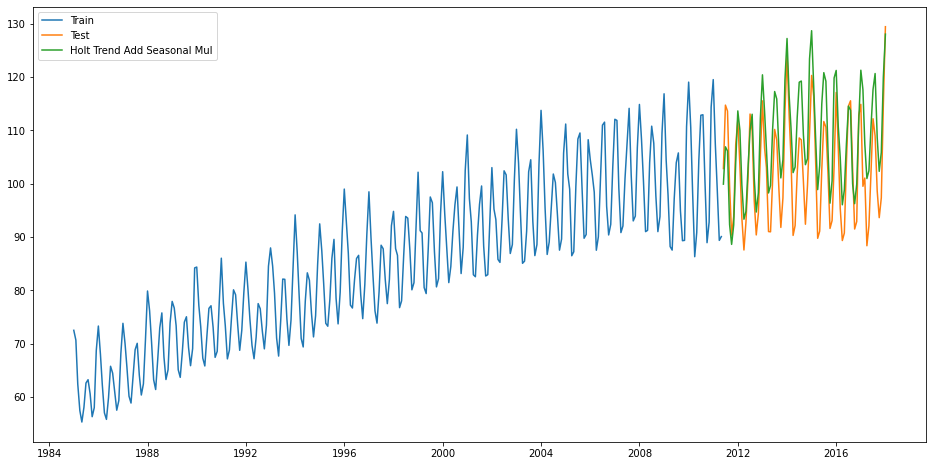

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(dep_train['IPG2211A2N'], label='Train')
plt.plot(dep_test['IPG2211A2N'], label='Test')
plt.plot(dt_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)


In [ ]:
#Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((dep_test['IPG2211A2N'] - dt_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(dep_test['IPG2211A2N'],dt_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(dep_test['IPG2211A2N'],dt_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Error of our forecasts is  6.735
Mean Absolute Percentage Error of our forecasts is  6.7  %
The Mean Squared Error of our forecasts is 58.568
The Root Mean Squared Error of our forecasts is 7.653


In [ ]:
#pemodelan
arima = auto_arima(dep_train, seasonal= True, m=12, information_criterion="aic", trace=True, random_state= 42)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1363.490, Time=15.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1561.800, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1413.742, Time=0.74 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1389.557, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1630.770, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1361.463, Time=6.59 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1460.445, Time=0.82 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1363.424, Time=16.62 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1410.789, Time=2.26 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=18.02 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1360.401, Time=3.59 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1460.030, Time=0.54 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1362.315, Time=4.30 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1362.274, Time=8.71 sec
 ARIMA(1,0,2)(1,1,0)[

In [ ]:
#cek arima yang cocok
#sebenarnya model ini sudah masuk sarimax
arima

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [ ]:
forecast = len(dep_test) #batas forcast
dep_pred= arima.predict(forecast) #pemanggilan fungsi model dengan parameter n_forecast
#mempermudah visualisasi
dates= pd.date_range(dep_train.index[-1], periods= forecast , freq="m")
dep_pred = pd.Series(dep_pred, index=dates)


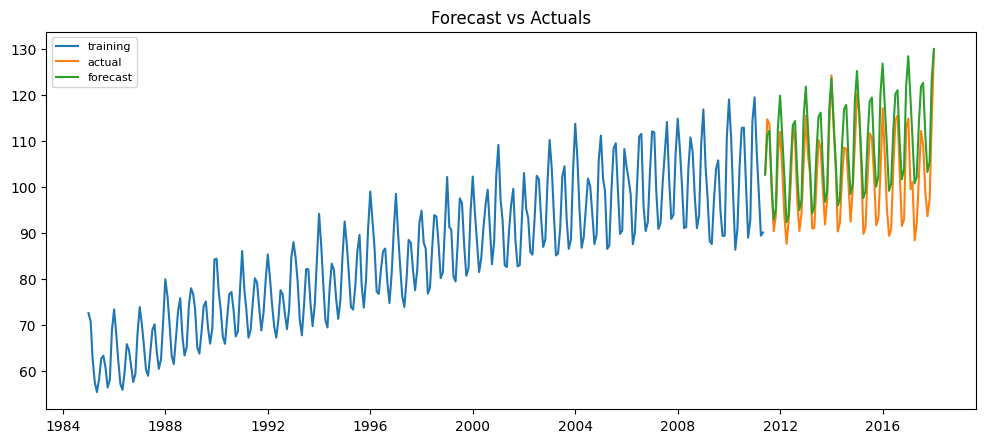

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(dep_train, label='training')
plt.plot(dep_test, label='actual')
plt.plot(dep_pred, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#manipulasi untuk membantu pengujian
dep_prediksi= pd.DataFrame(dep_pred)
dep_predict = dep_prediksi.reset_index()


In [ ]:
#manipulasi untuk membantu pengujian
dep_predict = dep_predict.drop('index',axis=1)

In [ ]:
#manipulasi untuk membantu pengujian
dep_testcp = dep_test.copy()
dep_testing = dep_testcp.reset_index()
dep_testing = dep_testing.drop('DATE', axis=1)
dep_testing.tail()


,IPG2211A2N
75,98.6154
76,93.6137
77,97.3359
78,114.7212
79,129.4048


In [ ]:
data_uji = {'IPG2211A2N':dep_testing['IPG2211A2N'], 'Forecasting': dep_predict[0] }
data_uji

{'Forecasting': 0     102.617779
 1     111.278609
 2     112.188842
 3     100.792151
 4      92.896776
          ...    
 75    111.171898
 76    103.216203
 77    105.396243
 78    123.348344
 79    130.006465
 Name: 0, Length: 80, dtype: float64, 'IPG2211A2N': 0     102.8204
 1     114.7068
 2     113.5958
 3      99.4712
 4      90.3566
         ...   
 75     98.6154
 76     93.6137
 77     97.3359
 78    114.7212
 79    129.4048
 Name: IPG2211A2N, Length: 80, dtype: float64}

In [ ]:
#manipulasi untuk membantu pengujian
df_datauji = pd.DataFrame(data_uji)
df_datauji.tail(20)

,IPG2211A2N,Forecasting
60,104.0375,112.148627
61,114.5397,120.199218
62,115.5159,121.040245
63,102.7637,109.579187
64,91.4867,101.623947
65,92.8900,103.804411
66,112.7694,121.756905
67,114.8505,128.415391
68,99.4901,119.367975
69,101.0396,110.828393


In [ ]:
#evaluasi hasil deploy arima
# Import module metrics dan panggil functionnya
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

depy_true = df_datauji['IPG2211A2N']
depy_pred = df_datauji['Forecasting']

print('The Mean Absolute Error of our forecasts is ', mean_absolute_error(depy_true, depy_pred).round(3))
print ('The Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(depy_true, depy_pred).round(3), '%')
print ('The Mean Squared Error of our forecasts is ', mean_squared_error(depy_true, depy_pred).round(3))
print ('The Root Mean Squared Error of our forecasts is ', np.sqrt(mean_squared_error(depy_true, depy_pred)).round(3))


The Mean Absolute Error of our forecasts is  6.688
The Mean Absolute Percentage Error of our forecasts is  0.066 %
The Mean Squared Error of our forecasts is  60.741
The Root Mean Squared Error of our forecasts is  7.794
